<h1 style="text-align:center;">SVM Classification</h1>


# Importing the Necessary Libraries

In [1]:
# Importing necessary libraries
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# Load the Iris Dataset and Print the Data. 

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [5]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [6]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SVM Implementation 
 We implement the SVM classifier with various kernels and parameters. We'll use Scikit-learn for this purpose

In [8]:
#Importing SVM for Parameter Tuning 
# Setting up parameter grid to test different SVM configurations
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Type of SVM kernel
}

# Create a SVC object
svm = SVC()

# Create a GridSearchCV object to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_scaled, y)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy: 0.9733333333333334


# Best SVM Configuration 

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define the SVM classifier with the best-found parameters
best_svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)

# Fit the SVM model on the scaled dataset
best_svm.fit(X_scaled, y)

# Make predictions
y_pred = best_svm.predict(X_scaled)

# Evaluate the model and print the results 
accuracy = best_svm.score(X_scaled, y)
print(f"Accuracy of the SVM model on the training dataset: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Accuracy of the SVM model on the training dataset: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]


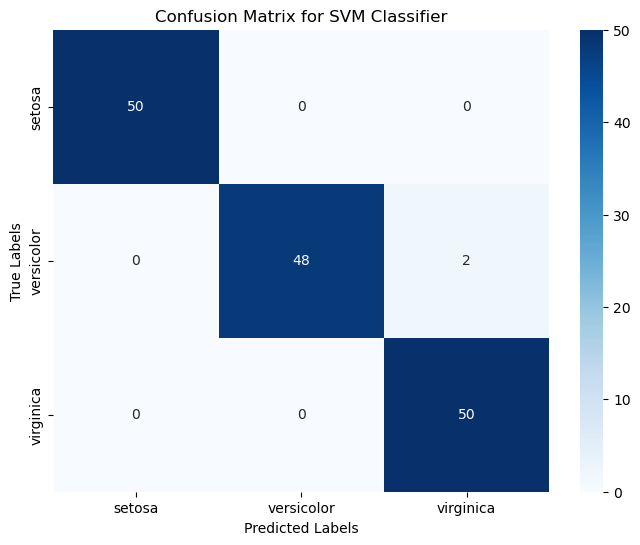

In [10]:
#Display the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# Visualize the Accuracy Comparison

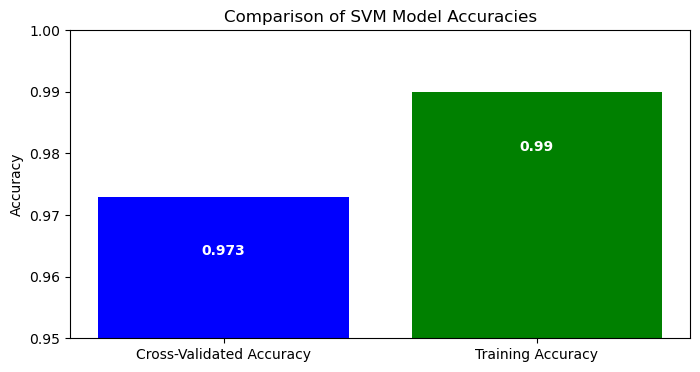

In [11]:
#Display the best Model Accuracy 
accuracies = [0.973, 0.99]
labels = ['Cross-Validated Accuracy', 'Training Accuracy']
plt.figure(figsize=(8, 4))
bars = plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Comparison of SVM Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)  
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.01, round(yval, 3), ha='center', va='bottom', color='white', weight='bold')
plt.show()

# K-fold Cross-Validation Implementation

Accuracy scores for each fold:
[0.96666667 1.         0.93333333 0.93333333 1.        ]

Mean cross-validation score: 0.97
Standard deviation of cross-validation scores: 0.03


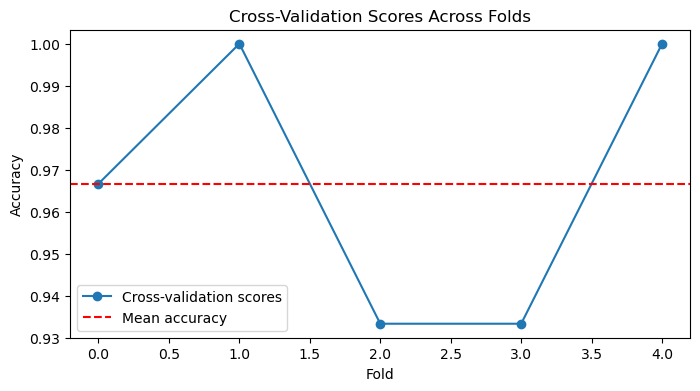

In [12]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=kfold, scoring='accuracy')

# Print out the accuracy for each fold
print("Accuracy scores for each fold:")
print(cv_scores)

# Calculate the mean and standard deviation of the scores
print("\nMean cross-validation score: {:.2f}".format(np.mean(cv_scores)))
print("Standard deviation of cross-validation scores: {:.2f}".format(np.std(cv_scores)))

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(cv_scores, label='Cross-validation scores', marker='o')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label='Mean accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores Across Folds')
plt.legend()
plt.show()

# Identifying Evaluation Metrics 

In [13]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



# Visualizing the Decision Boundaries of the SVM

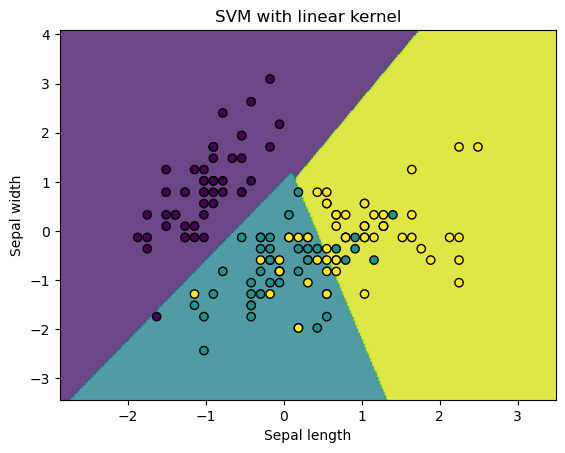

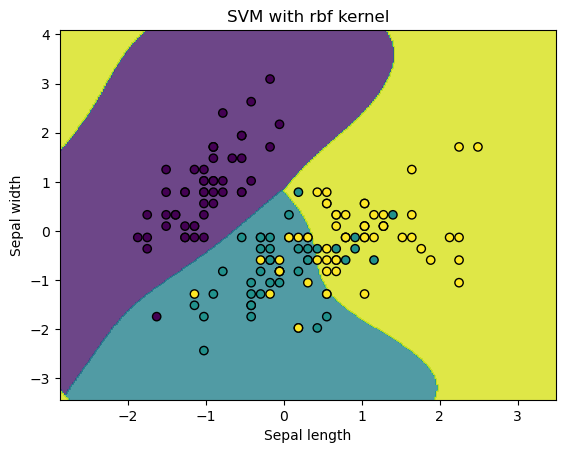

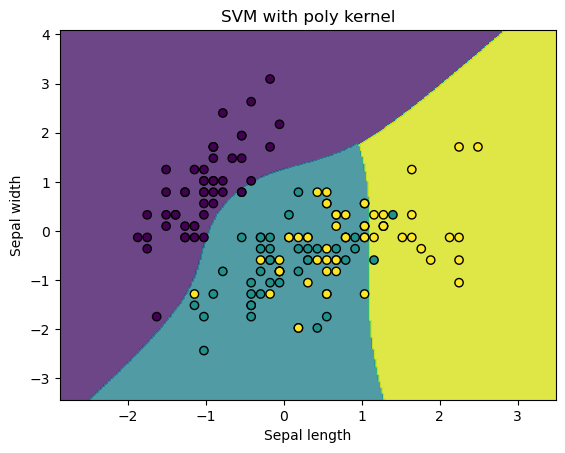

In [14]:
def plot_svm_boundaries(model, X, y, title="Decision Surface"):
    # Select two features for visualization
    X = X[:, :2]
    
    # Fit model
    model.fit(X, y)
    
    # Set the plot's range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict classifications for each point in meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the results
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()

# Plot decision boundaries for different kernels
for kernel in ['linear', 'rbf', 'poly']:
    svm_model = SVC(kernel=kernel)
    plot_svm_boundaries(svm_model, X_scaled, y, title=f"SVM with {kernel} kernel")


# Visualizing Cross-Validation Results

Fitting 5 folds for each of 4 candidates, totalling 20 fits


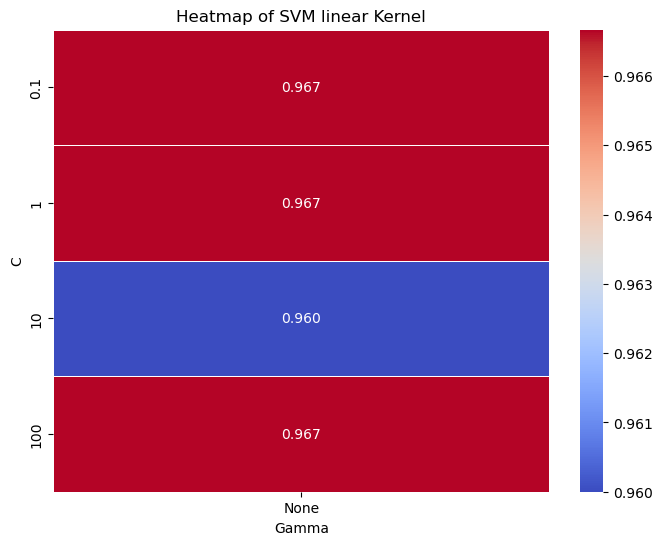

Fitting 5 folds for each of 8 candidates, totalling 40 fits


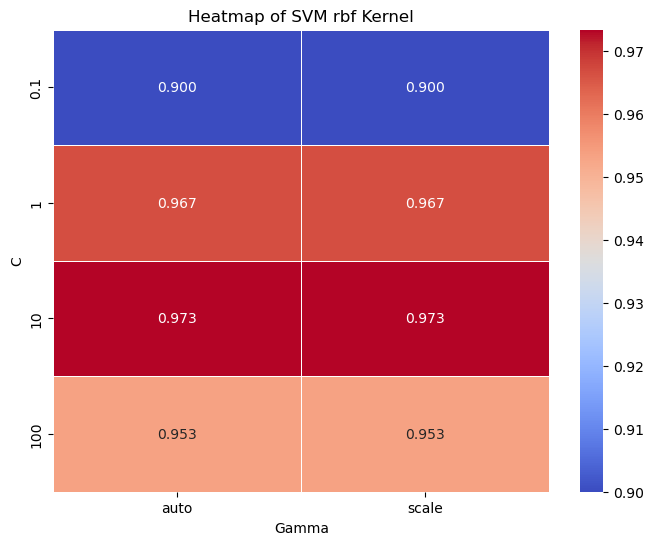

Fitting 5 folds for each of 8 candidates, totalling 40 fits


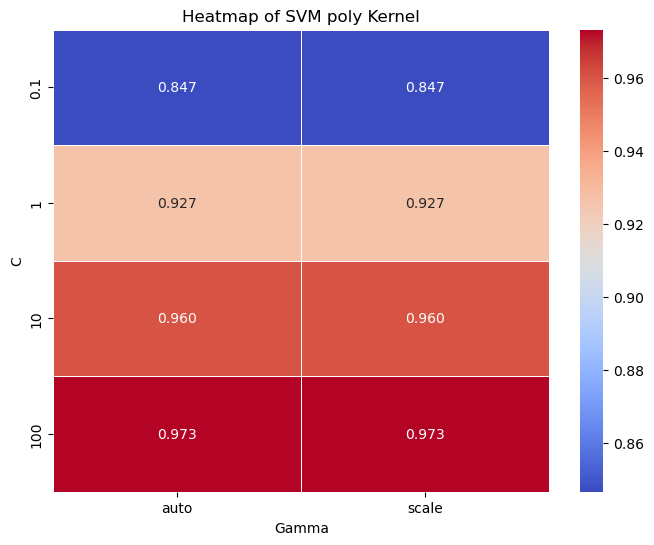

In [15]:
def plot_cv_heatmap(grid_search, title="CV Scores Heatmap"):
    # Extract scores and parameter settings directly from grid_search results
    scores = grid_search.cv_results_['mean_test_score']
    c_values = grid_search.cv_results_['param_C'].data
    gamma_values = grid_search.cv_results_['param_gamma'].data if 'param_gamma' in grid_search.cv_results_ else ['None'] * len(scores)
    
    # Create a DataFrame from the scores and parameters
    heatmap_data = pd.DataFrame({
        "C": c_values,
        "Gamma": gamma_values,
        "Score": scores
    })
    
    # Create a pivot table to reshape data for heatmap
    heatmap_pivot = heatmap_data.pivot(index='C', columns='Gamma', values='Score')
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".3f", cmap="coolwarm", linewidths=.5)
    plt.title(title)
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.show()

# Visualizing heatmaps for each kernel type
for kernel in ['linear', 'rbf', 'poly']:
    if kernel == 'linear':
        kernel_params = {'C': [0.1, 1, 10, 100], 'kernel': [kernel]}
    else:
        kernel_params = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': [kernel]}
    
    filtered_grid_search = GridSearchCV(SVC(), kernel_params, cv=5, scoring='accuracy', verbose=1)
    filtered_grid_search.fit(X_scaled, y)
    plot_cv_heatmap(filtered_grid_search, title=f"Heatmap of SVM {kernel} Kernel")
